# Project

## About This Data Set

This project intends to explore a collection of databases which contain four separate datasets regarding heart disease, respectively for Cleveland, Hungary, Switzerland, and the VA Long Beach. This project intends to specifically focus on the Cleveland database. This database contains 14 separate variables and 303 observations, including the target variable (diagnosis of heart disease), and 13 feature variables which consist of: 
age (years),
sex,
chest pain,
resting blood pressure (in mm Hg on admission to the hospital),
serum cholestoral(mg/dl),
fasting blood sugar > 120 mg/dl,
resting electrocardiographic results (Values:  norma, : having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 m, 2: showing probable or definite left ventricular hypertrophy by Estes' crite),a,
maximum_heart_rate_achieved,
exercise_induced_angina, ST_depress on_indu ed by_exerc se_relat ve to_resthe t,
sl of the pe_p ak_exerc se ST_segment,
num er of_ma or_vess coloured by fluoroscopyeled thalassemiand a,
diagnosis_of_heart_dise (where 0 is no presence, and 1-4 are presence)ase.

## The Question Project Intends to Answer

This bfibfiwbfiwebfiw

## Loading Libraries

In [20]:
library(tidyverse)
library(tidymodels)

## Reading and Wrangling Data

Below I first read the Cleveleand dataset into R and then provided the columns with appropriate names. I then filtered out the observations which contained missing values in the number of major vessels and/or thalassemia columns (as it was only 6 out of 303 columns I felt this was an appropriate solution). I then mutated the columns into the appropriate variable type. 

In [62]:
data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)
data <- og_data |>
    rename(age = X1, sex = X2, chest_pain = X3, resting_blood_pressure = X4, serum_cholestoral_mgdl = X5,
           fasting_blood_sugar = X6, resting_ecg_results = X7, maximum_heart_rate_achieved = X8,
           exercise_induced_angina = X9, ST_depression_induced_by_exercise_relative_to_rest = X10,
           slope_peak_exercise_ST_segment = X11, number_of_major_vessels = X12, thalassemia = X13, 
           diagnosis_of_heart_disease = X14) |>
    filter(number_of_major_vessels != "?", thalassemia != "?") |>
    mutate(sex = as_factor(sex), chest_pain = as_factor(chest_pain), fasting_blood_sugar = as_factor(fasting_blood_sugar),
           resting_ecg_results = as_factor(resting_ecg_results), exercise_induced_angina = as_factor(exercise_induced_angina),
           slope_peak_exercise_ST_segment = as_factor(slope_peak_exercise_ST_segment), thalassemia = as_factor(thalassemia),
           diagnosis_of_heart_disease = as_factor(diagnosis_of_heart_disease)) |>
    mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
           chest_pain = fct_recode(chest_pain, "typical_angina" = "1", "atypical_angina" = "2", "non-anginal_pain" = '3', "asymptomatic" = "4"),
           fasting_blood_sugar = fct_recode(fasting_blood_sugar, "true" = "1", "false" = "0"),
           resting_ecg_results = fct_recode(resting_ecg_results, "normal" = "0", "having_ST-T_wave_abnormality" = "1", "left_ventricular_hypertrophy" = "2"),
           exercise_induced_angina = fct_recode(exercise_induced_angina, "yes" = "1", "no" = "0"),
           slope_peak_exercise_ST_segment = fct_recode(slope_peak_exercise_ST_segment, "unsloping" = "1", "flat" = "2", "downsloping" = "3"),
           thalassemia = fct_recode(thalassemia, "normal" = "3.0", "fixed_defect" = "6.0", "reversable_defect" = "7.0"),
           diagnosis_of_heart_disease = fct_recode(diagnosis_of_heart_disease, "no" = "0", "yes" = "1", "yes" = "2", "yes" = "3",
                                                  "yes" = "4")) |>
    mutate(number_of_major_vessels = as.double(number_of_major_vessels))   

na_count <- og_data |>
  filter(X12 == "?"| X13 == "?") |>
  summarize(count = n())
head(na_count)


head(data)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


count
<int>
6


age,sex,chest_pain,resting_blood_pressure,serum_cholestoral_mgdl,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_peak_exercise_ST_segment,number_of_major_vessels,thalassemia,diagnosis_of_heart_disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,male,typical_angina,145,233,true,left_ventricular_hypertrophy,150,no,2.3,downsloping,0,fixed_defect,no
67,male,asymptomatic,160,286,false,left_ventricular_hypertrophy,108,yes,1.5,flat,3,normal,yes
67,male,asymptomatic,120,229,false,left_ventricular_hypertrophy,129,yes,2.6,flat,2,reversable_defect,yes
37,male,non-anginal_pain,130,250,false,normal,187,no,3.5,downsloping,0,normal,no
41,female,atypical_angina,130,204,false,left_ventricular_hypertrophy,172,no,1.4,unsloping,0,normal,no
56,male,atypical_angina,120,236,false,normal,178,no,0.8,unsloping,0,normal,no


## Splitting the Data into Training and Testing Data

In [77]:
set.seed(2007)
data_split <- initial_split(data, prop = 0.75, strata = diagnosis_of_heart_disease)
data_train <- training(data_split)
data_test <- testing(data_split)
head(data_train)
head(data_test)

age,sex,chest_pain,resting_blood_pressure,serum_cholestoral_mgdl,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_peak_exercise_ST_segment,number_of_major_vessels,thalassemia,diagnosis_of_heart_disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
37,male,non-anginal_pain,130,250,false,normal,187,no,3.5,downsloping,0,normal,no
56,male,atypical_angina,120,236,false,normal,178,no,0.8,unsloping,0,normal,no
57,female,asymptomatic,120,354,false,normal,163,yes,0.6,unsloping,0,normal,no
57,male,asymptomatic,140,192,false,normal,148,no,0.4,flat,0,fixed_defect,no
56,female,atypical_angina,140,294,false,left_ventricular_hypertrophy,153,no,1.3,flat,0,normal,no
44,male,atypical_angina,120,263,false,normal,173,no,0.0,unsloping,0,reversable_defect,no


age,sex,chest_pain,resting_blood_pressure,serum_cholestoral_mgdl,fasting_blood_sugar,resting_ecg_results,maximum_heart_rate_achieved,exercise_induced_angina,ST_depression_induced_by_exercise_relative_to_rest,slope_peak_exercise_ST_segment,number_of_major_vessels,thalassemia,diagnosis_of_heart_disease
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,male,typical_angina,145,233,true,left_ventricular_hypertrophy,150,no,2.3,downsloping,0,fixed_defect,no
41,female,atypical_angina,130,204,false,left_ventricular_hypertrophy,172,no,1.4,unsloping,0,normal,no
53,male,asymptomatic,140,203,true,left_ventricular_hypertrophy,155,yes,3.1,downsloping,0,reversable_defect,yes
52,male,non-anginal_pain,172,199,true,normal,162,no,0.5,unsloping,0,reversable_defect,no
58,male,non-anginal_pain,132,224,false,left_ventricular_hypertrophy,173,no,3.2,unsloping,2,reversable_defect,yes
66,female,typical_angina,150,226,false,normal,114,no,2.6,downsloping,0,normal,no


## Exploring the Diagnosis of Heart Disease Variable

Below I decided to see how many observations there are in each group of the diagnosis of heart disease (the groups being yes or no). And then visualize the distribution of the variable through a histogram. I found that there is a relatively equal distribution between the yes and no values. 

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


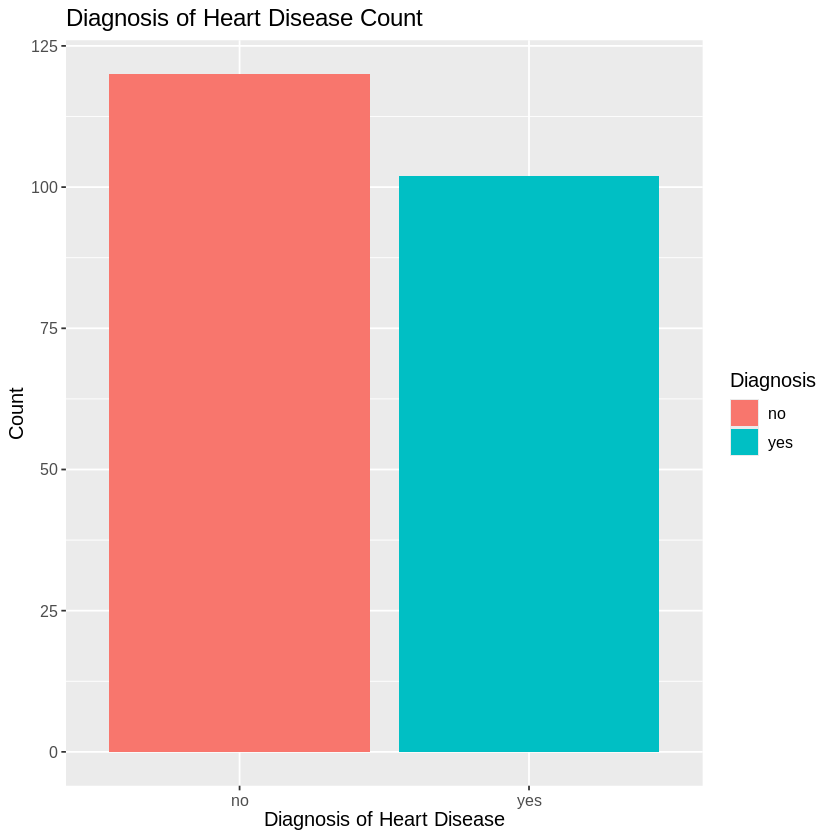

In [80]:
observations_hist <- data_train |>
    ggplot(aes(x = diagnosis_of_heart_disease, fill = diagnosis_of_heart_disease)) +
    geom_histogram(stat = "count") +
    labs(title = "Diagnosis of Heart Disease Count", x = "Diagnosis of Heart Disease", fill = "Diagnosis", y = "Count") +
    theme(text = element_text(size = 12))
observations_hist
    
summary <- 

## Relationship Between Diagnosis and Other Variables

Below i decided to visualize the relationship between 

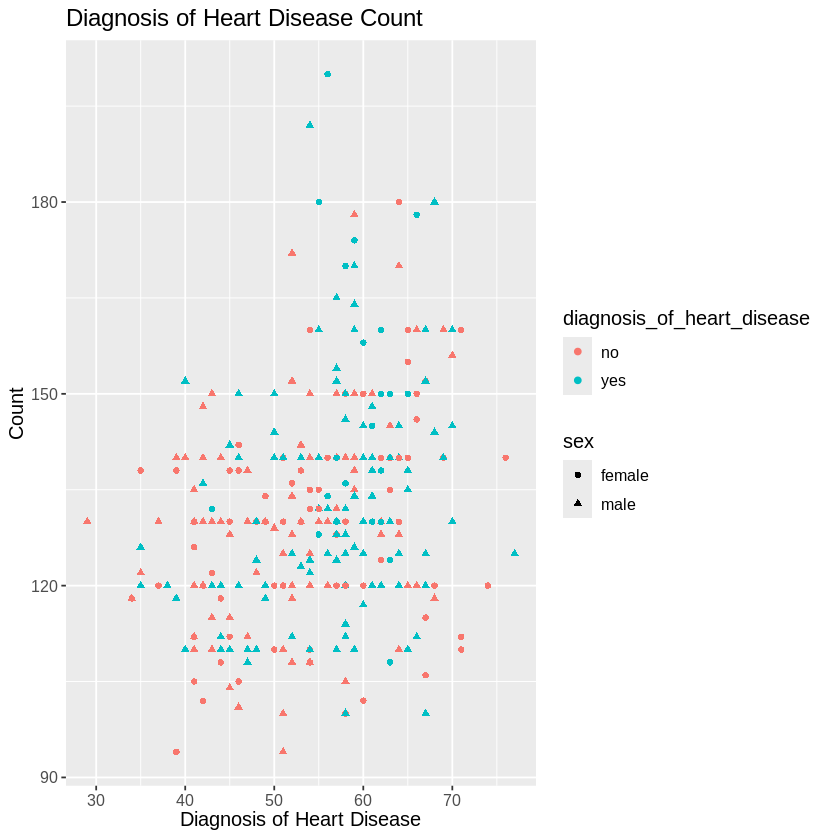

In [72]:
visualization <- data |>
    ggplot(aes(x = age, y = resting_blood_pressure,  colour = diagnosis_of_heart_disease, shape = sex)) +
    geom_point() +
    labs(title = "Diagnosis of Heart Disease Count", x = "Diagnosis of Heart Disease", fill = "Diagnosis", y = "Count") +
    theme(text = element_text(size = 12))
visualization